In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = load_breast_cancer()

In [7]:
X, y = data.data, data.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Standardize the features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Reduce dimensions using PCA (2D for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [12]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8772

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.91      0.89      0.90        72

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[36  6]
 [ 8 64]]


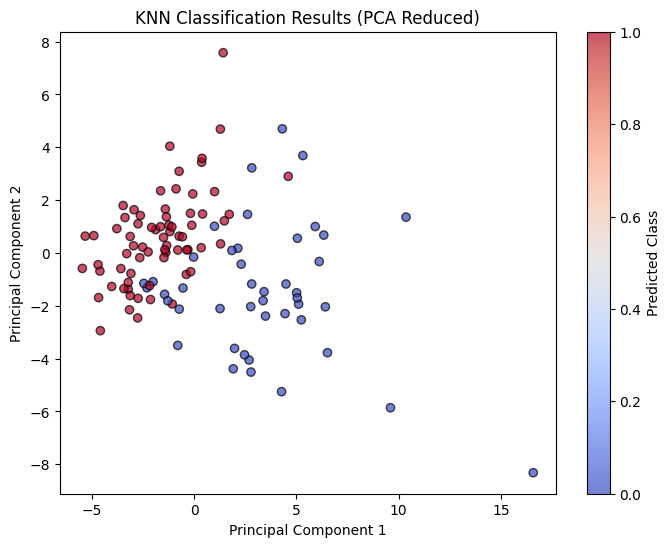

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Classification Results (PCA Reduced)")
plt.colorbar(label="Predicted Class")
plt.show()

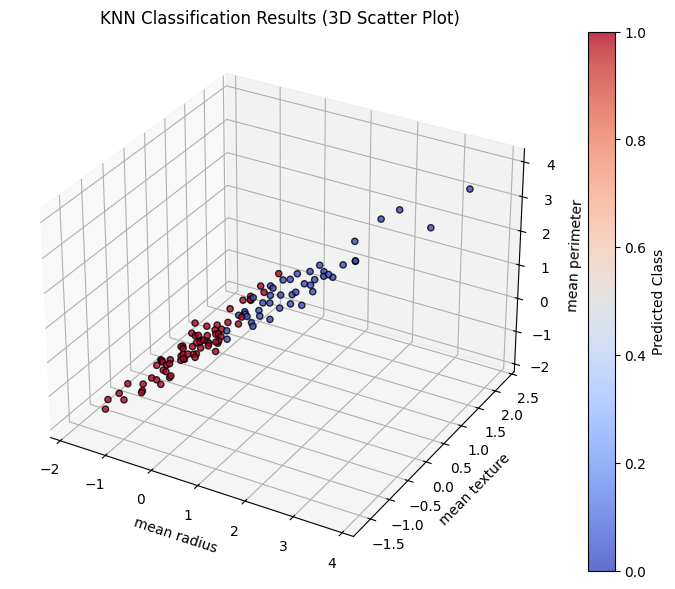

In [15]:
# 3D Scatter Plot of Classification Results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on predicted class
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.8)

# Labeling
ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_zlabel(feature_names[selected_features[2]])
ax.set_title("KNN Classification Results (3D Scatter Plot)")

# Colorbar to show class distinction
legend1 = plt.colorbar(scatter, ax=ax)
legend1.set_label("Predicted Class")

plt.show()

X, Y, Z axes represent the three selected features.
Color represents predicted class (Malignant/Benign).
Colorbar helps differentiate the classes.